In [2]:
import numpy as np
import matplotlib.pyplot as plt  

In [3]:
#generatic synthetic data points
np.random.seed(1)

In [6]:
#generating synthetic X
x = 2 * np.random.rand(100,1)

In [7]:
x

array([[0.6532898 ],
       [1.0541162 ],
       [1.7718842 ],
       [0.71453952],
       [1.8170703 ],
       [1.24672023],
       [0.03164249],
       [1.85887447],
       [1.38179384],
       [1.9946457 ],
       [0.34468102],
       [0.2742715 ],
       [1.86519093],
       [1.39363632],
       [0.13200035],
       [1.51092611],
       [1.50775238],
       [1.84604907],
       [1.42304952],
       [0.24854192],
       [0.03976027],
       [0.05242197],
       [0.05661298],
       [0.49242214],
       [1.7200559 ],
       [1.07766213],
       [1.10564396],
       [1.68406178],
       [0.24834663],
       [0.55836736],
       [1.17151854],
       [1.9391915 ],
       [1.12206044],
       [0.03729458],
       [1.60126535],
       [0.46594855],
       [1.61421039],
       [0.77572129],
       [1.72708371],
       [1.49424329],
       [1.11248047],
       [0.27291045],
       [0.11983538],
       [0.24268691],
       [0.08910376],
       [0.21498826],
       [0.45141868],
       [1.425

In [8]:
#generating synthetic dp y
y = 4 +3*X+1.5*X**2+np.random.randn(100, 1)

In [9]:
y

array([[ 7.62339727],
       [12.05353148],
       [ 4.23318089],
       [ 7.04497675],
       [ 4.69964232],
       [ 2.1703523 ],
       [ 6.36454307],
       [ 8.97681731],
       [ 7.76651586],
       [ 8.87468601],
       [ 7.43306659],
       [10.8094174 ],
       [ 5.49492724],
       [12.77322728],
       [ 3.65173158],
       [ 9.72293833],
       [ 7.79748776],
       [ 8.92830376],
       [ 5.45578391],
       [ 5.24937097],
       [13.63795379],
       [15.64828623],
       [ 8.66065309],
       [ 9.1334384 ],
       [13.2197659 ],
       [15.07105337],
       [ 7.08198608],
       [ 3.99484558],
       [ 5.23570574],
       [13.66934632],
       [ 5.97957071],
       [ 7.30332768],
       [15.93272113],
       [ 8.58478144],
       [ 9.75086757],
       [ 6.80394219],
       [11.44989152],
       [14.48057999],
       [ 4.0012894 ],
       [11.25980279],
       [16.36300515],
       [12.0882421 ],
       [ 6.43522203],
       [12.40033442],
       [ 5.84362826],
       [ 8

In [11]:
#train test split
from sklearn.model_selection import train_test_split


In [12]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [14]:
x_train.shape, x_test.shape

((20, 1), (80, 1))

In [15]:
#perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
degree = 2
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
x_poly_train = poly_features.fit_transform(x_train)

In [19]:
x_poly_train

array([[1.33072963e-01, 1.77084134e-02],
       [4.06586469e-01, 1.65312557e-01],
       [6.34724819e-01, 4.02875595e-01],
       [2.14988258e-01, 4.62199512e-02],
       [8.91037571e-02, 7.93947953e-03],
       [1.49424329e+00, 2.23276300e+00],
       [5.66129760e-02, 3.20502906e-03],
       [1.25943501e+00, 1.58617655e+00],
       [3.44681017e-01, 1.18805003e-01],
       [6.53289804e-01, 4.26787567e-01],
       [1.42304952e+00, 2.02506993e+00],
       [1.17151854e+00, 1.37245570e+00],
       [7.60282345e-01, 5.78029244e-01],
       [3.72945787e-02, 1.39088560e-03],
       [5.26593541e-01, 2.77300757e-01],
       [1.81707030e+00, 3.30174448e+00],
       [1.33846579e+00, 1.79149066e+00],
       [5.29839115e-01, 2.80729488e-01],
       [1.86519093e+00, 3.47893719e+00],
       [1.93919150e+00, 3.76046366e+00]])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
poly_reg = LinearRegression()

In [25]:
ploy_reg

NameError: name 'ploy_reg' is not defined

In [27]:
poly_reg.fit(x_poly_train, y_train)

LinearRegression()

In [28]:
poly_reg.coef_

array([[ 8.66982316, -4.41775357]])

In [30]:
poly_reg.intercept_


array([6.01143714])

In [32]:
#making prediction on train data itself
y_poly_predict = poly_reg.predict(x_poly_train)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse_train = mean_squared_error(y_train, y_poly_predict)
print(f'Mean Squared Error on Training Data: {mse_train}')


Mean Squared Error on Training Data: 9.82016598486546


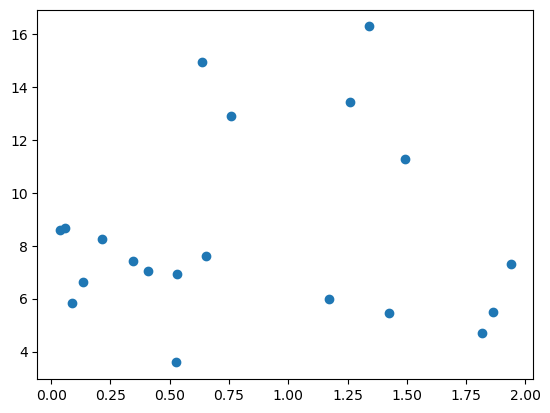

In [36]:
plt.scatter(x_train, y_train, label = "training data")

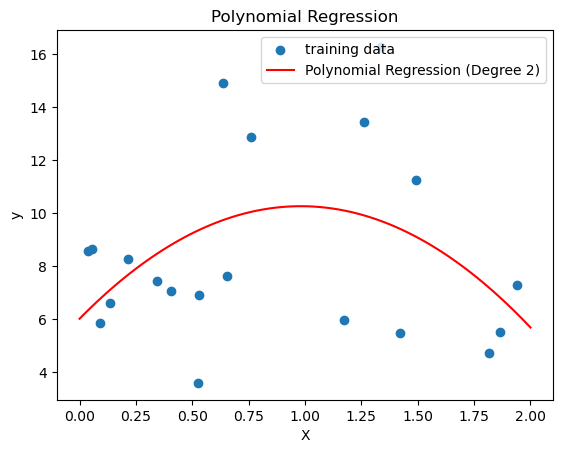

In [40]:
plt.scatter(x_train, y_train, label = "training data")
x_range = np.linspace(0, 2, 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
plt.plot(X_range, poly_reg.predict(x_range_poly), color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()